# Areas at risk
This is an example of spatial join in which we merge add information about the risk of landslides to a datasets of the municipalities in the Latium region of Italy. We will count the number of landslides that have been detected in each municipality to provide a rough estimation of the risk and we will show a choropleth map with the municipalities colored according to the risk.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
print("numpy version: %s"%np.__version__)
print("geopandas version: %s"%gpd.__version__)

numpy version: 1.23.1
geopandas version: 0.11.1


## Data analysis

We open the dataset of the municipalities in the Latium region

In [79]:
lazio_gdf_tmp = gpd.read_file('data/vector/italy/istat_confini_comuni/lazio/comuni_lazio.shx')
lazio_gdf_tmp.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,geometry
0,3,12,58,258,258,58083,058083,Riofreddo,None,0,1.238413e+07,16120.664597,"POLYGON ((832507.251 4666071.875, 832469.313 4..."
1,3,12,58,258,258,58084,058084,Rocca Canterano,None,0,1.583707e+07,19220.123139,"POLYGON ((831006.885 4655663.966, 831078.822 4..."
2,3,12,58,258,258,58085,058085,Rocca di Cave,None,0,1.108538e+07,14311.900208,"POLYGON ((827052.965 4641862.514, 827092.712 4..."
3,3,12,56,0,56,56014,056014,Capranica,None,0,4.096831e+07,30863.172460,"POLYGON ((757298.401 4687240.264, 757364.463 4..."
4,3,12,56,0,56,56015,056015,Caprarola,None,0,5.757693e+07,41605.105931,"POLYGON ((762244.792 4695086.155, 762262.171 4..."


In [80]:
num_municipalities_latium = len(lazio_gdf_tmp)
print('Number of municipalities in the Latium region: {0:d}'.format(num_municipalities_latium))

Number of municipalities in the Latium region: 378


(690707.8065800004, 930427.8436199996, 4513096.596460001, 4757977.743740001)

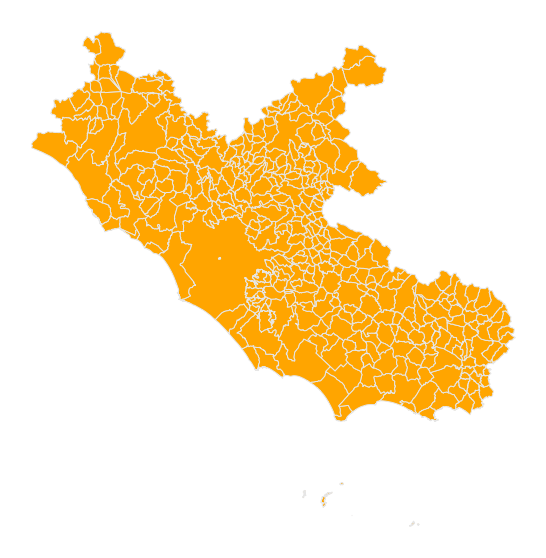

In [81]:
fig, ax = plt.subplots(1, figsize=(15, 10))
lazio_gdf_tmp.plot(color='orange', ax=ax, edgecolor='0.9')
ax.axis('off')

Then we open the dataset of the landslides that have been catalogued in the Latium region

In [82]:
lazio_landslides_gdf_tmp = gpd.read_file('data/vector/italy/landslides/lazio/frane_poly_opendataPolygon.shp')
lazio_landslides_gdf_tmp.head()

,id_frana,tipo_movim,nome_tipo,regione,nome_reg,provincia,nome_prov,comune,nome_com,autorita_d,nome_distr,geometry
0,0570067500,7,Complesso,12.0,Lazio,57.0,Rieti,57070.0,Torri in Sabina,4,Appennino Centrale,"POLYGON ((799609.508 4695439.461, 799604.138 4..."
1,0570075600,4,Colamento lento,12.0,Lazio,57.0,Rieti,57048.0,Paganico Sabino,4,Appennino Centrale,"POLYGON ((829738.629 4678789.641, 829722.076 4..."
2,0580073500,5,Colamento rapido,12.0,Lazio,58.0,Roma,58085.0,Rocca di Cave,5,Appennino Meridionale,"POLYGON ((826799.137 4639024.047, 826867.931 4..."
3,0600276700,4,Colamento lento,12.0,Lazio,60.0,Frosinone,60031.0,Esperia,5,Appennino Meridionale,"POLYGON ((883939.040 4592590.763, 883963.942 4..."
4,0600514900,1,Crollo/Ribaltamento,12.0,Lazio,60.0,Frosinone,60077.0,Terelle,5,Appennino Meridionale,"POLYGON ((897682.567 4611251.662, 897688.147 4..."


In [83]:
confini_lazio_gdf = gpd.read_file('data/vector/italy/istat_confini_regioni/confini_lazio/confini_lazio.shp')

(690707.8065800004, 930427.8436199996, 4513096.596460001, 4757977.743740001)

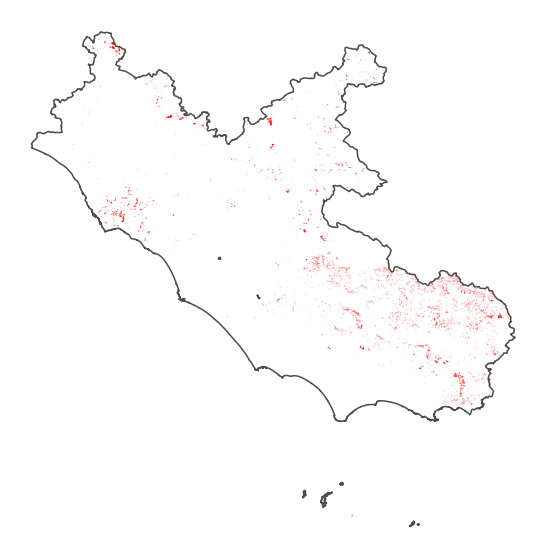

In [84]:
fig, ax = plt.subplots(1, figsize=(15, 10))
lazio_landslides_gdf_tmp.plot(facecolor='red', ax=ax)
confini_lazio_gdf.plot(ax=ax, color='None', linewidth=1.5, edgecolor='0.3')
ax.axis('off')

We count the number of landslides in each municipalities and compute some statistics

In [85]:
landslides_per_mun = lazio_landslides_gdf_tmp.groupby('nome_com').count()
num_landslides = landslides_per_mun['id_frana']
num_landslides.head()

nome_com
Accumoli         17
Acquafondata      1
Acquapendente    52
Acuto             3
Affile            5
Name: id_frana, dtype: int64

In [86]:
tot_num_landslides_latium = sum(num_landslides)
print('Total number of landslides in the Latium region: {0:d}'.format(tot_num_landslides_latium))

Total number of landslides in the Latium region: 5953


In [87]:
num_municipalities_at_risk_latium = len(num_landslides)
print('Number of municipalities at risk of landslides in the Latium region: {0:d}'.format(num_municipalities_at_risk_latium))

Number of municipalities at risk of landslides in the Latium region: 291


In [88]:
ratio = (num_municipalities_at_risk_latium / num_municipalities_latium) * 100
print('Percentage of municipalities at risk of landslides in the Latium region: {0:.1f} %'.format(ratio))

Percentage of municipalities at risk of landslides in the Latium region: 77.0 %


In [89]:
municip_max_num_landslides = num_landslides.idxmax()
max_num_landslides = num_landslides[municip_max_num_landslides]
print('Municipality with max number of landslides: {0:s}. Total landslides: {1:d}'.format(municip_max_num_landslides, max_num_landslides))

Municipality with max number of landslides: Veroli. Total landslides: 187


## Merge
Now we want to add the information about the risk of landslides to the datasets that contains the geometry of the municipalities in the Latium region. We have 378 municipalities and 291 of them have at least one landslide in its territory. A first technique to achieve our goal is to do a merge of the two datasets. After the merge we expect to have a new column, let's say 'NUM_LANDSLIDES' added to lazio_landslides_gdf_tmp. The total number of rows will stay the same, 378, with the infomation about the number of landslides. The 87 municipalities without landslides will have 0 as value for 'NUM_LANDSLIDES'. 

We need a dataframe of the municipalities with the number of landslides. Before creating the dataframe from the list of municipalities with at least one landslide we have to add to the list those that do not have any.   

In [141]:
municip_risk = {}
for i in range(0, len(lazio_gdf_tmp)):
    comune = lazio_gdf_tmp.loc[i]['COMUNE'] 
    try: 
        landslides = num_landslides[comune]
        municip_risk[comune] = landslides
    except KeyError:
        municip_risk[comune] = 0

In [142]:
len(municip_risk)

378

In [143]:
municipalities_at_risk_latium_df = pd.DataFrame({ 'COMUNE': municip_risk.keys(), 'NUM_LANDSLIDES': municip_risk.values() })
municipalities_at_risk_latium_df.head()

,COMUNE,NUM_LANDSLIDES
0,Riofreddo,0
1,Rocca Canterano,21
2,Rocca di Cave,22
3,Capranica,6
4,Caprarola,3


In [137]:
len(municipalities_at_risk_latium_df)

378

In [138]:
merged_df = lazio_gdf_tmp.merge(municipalities_at_risk_latium_df, left_on=['COMUNE'], right_on=['COMUNE'])
merged_df.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Area,Shape_Leng,geometry,NUM_LANDSLIDES
0,3,12,58,258,258,58083,058083,Riofreddo,None,0,1.238413e+07,16120.664597,"POLYGON ((832507.251 4666071.875, 832469.313 4...",0
1,3,12,58,258,258,58084,058084,Rocca Canterano,None,0,1.583707e+07,19220.123139,"POLYGON ((831006.885 4655663.966, 831078.822 4...",21
2,3,12,58,258,258,58085,058085,Rocca di Cave,None,0,1.108538e+07,14311.900208,"POLYGON ((827052.965 4641862.514, 827092.712 4...",22
3,3,12,56,0,56,56014,056014,Capranica,None,0,4.096831e+07,30863.172460,"POLYGON ((757298.401 4687240.264, 757364.463 4...",6
4,3,12,56,0,56,56015,056015,Caprarola,None,0,5.757693e+07,41605.105931,"POLYGON ((762244.792 4695086.155, 762262.171 4...",3


In [139]:
len(merged_df)

378

(690707.8065800004, 930427.8436199996, 4513096.596460001, 4757977.743740001)

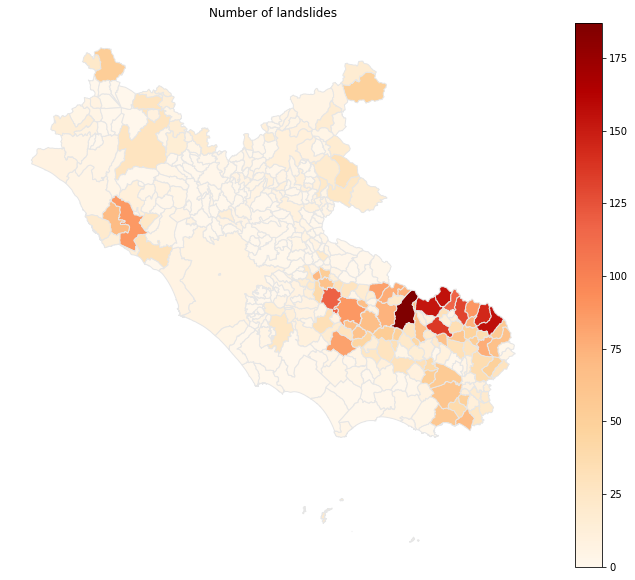

In [144]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.set_title('Number of landslides')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.5)
merged_df.plot(column='NUM_LANDSLIDES', cmap='OrRd', linewidth=1, ax=ax, cax=cax, edgecolor='0.9', 
            legend = True, legend_kwds={'label': ''})
ax.axis('off')

## Spatial join

In [15]:
inner_join = lazio_gdf_tmp.sjoin(lazio_landslides_gdf_tmp, how="inner")
inner_join.head()

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,...,tipo_movim,nome_tipo,regione,nome_reg,provincia,nome_prov,comune,nome_com,autorita_d,nome_distr
1,3,12,58,258,258,58084,058084,Rocca Canterano,None,0,...,4,Colamento lento,12.0,Lazio,58.0,Roma,58084.0,Rocca Canterano,4,Appennino Centrale
181,3,12,58,258,258,58027,058027,Cerreto Laziale,None,0,...,4,Colamento lento,12.0,Lazio,58.0,Roma,58084.0,Rocca Canterano,4,Appennino Centrale
1,3,12,58,258,258,58084,058084,Rocca Canterano,None,0,...,5,Colamento rapido,12.0,Lazio,58.0,Roma,58084.0,Rocca Canterano,4,Appennino Centrale
1,3,12,58,258,258,58084,058084,Rocca Canterano,None,0,...,7,Complesso,12.0,Lazio,58.0,Roma,58084.0,Rocca Canterano,4,Appennino Centrale
1,3,12,58,258,258,58084,058084,Rocca Canterano,None,0,...,7,Complesso,12.0,Lazio,58.0,Roma,58084.0,Rocca Canterano,4,Appennino Centrale


In [16]:
len(inner_join)

6364

In [17]:
inner_join.groupby('nome_com').count()['id_frana']

nome_com
Accumoli               18
Acquafondata            1
Acquapendente          53
Acuto                   4
Affile                  6
                       ..
Villa Santo Stefano    11
Viterbo                29
Viticuso                4
Vitorchiano             4
Zagarolo                4
Name: id_frana, Length: 291, dtype: int64

## SQL query
TDB